# Nonlinear Least Square Problems

In [5]:
from scipy import optimize

import matplotlib.pyplot as plt
import numpy as np
import sympy

sympy.init_printing()

### In general, a least square problem can be viewed as an optimization problem with the objective function

$g(x)=\sum_{i=0}^{m}r_i(\beta^2)=\|r_i(\beta)\|^2$

where $r(\beta)$ is a vector with the residuals $r_i(\beta) = y_i − f (x_i, \beta)$ for a set of $m$ observations
$(x_i, y_i)$

Here $β$ is a vector with unknown parameters that specifies the function $f (x, β)$. If this problem is nonlinear in the parameters $β$, it is known as a nonlinear least square problem, and since it is nonlinear, it cannot be solved with the linear algebra techniques

Instead, we can use the multivariate optimization techniques described in the previous section, such as Newton’s method or a quasi-Newton method. However, this nonlinear least square optimization problem has a specific structure, and several methods that are tailored to solve this particular optimization problem have been developed. One example is the *Levenberg-Marquardt method*, which is based on the idea of successive linearizations of the problem in each iteration

In SciPy, the function `optimize.leastsq` provides a nonlinear least square solver that uses the *Levenberg-Marquardt method*. To illustrate how this function can be used, consider a nonlinear model on the form $f (x, β) = β_0+β_1 exp (−β_2x^2)$ and a set of
observations $(x_i, y_i)$

In [6]:
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

> Once the model function is defined, we generate randomized data points that simulate the observations

In [7]:
# Generate linspace
xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

With the model function and observation data prepared, we are ready to start solving the nonlinear least square problem. The first step is to define a function for the residuals given the data and the model function, which is specified in terms of the yet-to-be
determined model parameters β

In [8]:
def g(beta):
    return ydata - f(xdata, *beta)

Next we define an initial guess for the parameter vector and let the `optimize.leastsq` function solve for the best least square fit for the parameter vector

In [9]:
beta_start = (1, 1, 1)

beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.27321195, 0.76060009, 0.55083316])

Here the best fit is quite close to the true parameter values `(0.25, 0.75, 0.5)`, as defined earlier. By plotting the observation data and the model function for the true and fitted function parameters, we can visually confirm that the fitted model seems to describe the data well

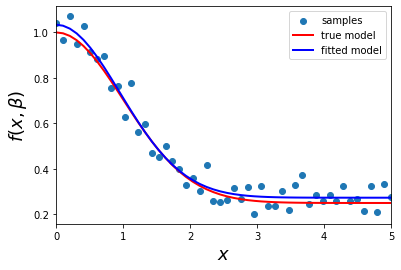

In [10]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')

ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

> Nonlinear least square fit to the function

The SciPy optimize module also provides an alternative interface to nonlinear least square fitting, through the function `optimize.curve_fit`. This is a convenience wrapper around `optimize.leastsq`, which eliminates the need to explicitly define the residual function for the least square problem. The previous problem could therefore be solved more concisely using the following

In [11]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.27321195, 0.76060009, 0.55083316])